In [6]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import matplotlib
import scipy.stats

In [81]:
colorectal = pd.read_csv('data/Colorectal TCGA.csv')
lung_adeno = pd.read_csv('data/Lung Adenocarcinoma (TCGA, Provisional).csv')
lung_squa = pd.read_csv('data/Lung Squamous Cell Carcinoma (TCGA, Provisional).csv')

In [82]:
ces_colo = pd.read_table('data/expr_ces.txt')
ces_adeno = pd.read_table('data/lung_ces_expr.txt')
ces_squa = pd.read_table('data/lung2_ces_expr.txt')

In [108]:
msi_colo = pd.read_table('data/colorectal_msi_expr.txt').transpose()[2:]
msi_adeno = pd.read_table('data/lungAdeno_msi_expr.txt').transpose()[2:]
msi_squa = pd.read_table('data/lungSqua_msi_expr.txt').transpose()[2:]
msi_colo.columns = pd.read_table('data/colorectal_msi_expr.txt')['COMMON']
msi_adeno.columns = pd.read_table('data/lungAdeno_msi_expr.txt')['COMMON']
msi_squa.columns = pd.read_table('data/lungSqua_msi_expr.txt')['COMMON']

In [109]:
upreg = ['ANG','TFF2','SRSF6','SET','EIF5A','RARRES1' ,'CRIP1','CD55','IQGAP2','P4HA1',
         'TYMS','GLRX','NUCB2','FUT8','HNRNPL','PCCB','EIF5A','POLR2L','GTF2A2','GALNT1',
         'NDUFA9','TNNT1','AHR','PRKAR2B','ATP5A1','AMFR','OSTF1','CALM1','MANF','EWSR1',
         'SSR1','MFAP1','GNAQ','PPP2R5E','USP14','GCH1','KIF11','CASP2','SLC1A1','PGGT1B','RAB27B']
downreg = ['FTO','PLAGL1','STK38','DMD','NONO','CSNK1E','TCF7','POFUT1','OCRL','ELF1','LRP1','MLH1',
           'MARCKS','JUN','ELN','RAB32','TSC22D1','YWHAB','SEMA3C','GABRE','NEK3','PRKCI','TGFBR2',
           'FCGRT','CFTR','SERINC3','HSPH1','TDGF1','CYP2B7P']

In [170]:
def mrr_cat(df_msi):
    df = pd.DataFrame()
    for ix,row in df_msi.iterrows():
        up = row[upreg].sum()
        down = row[downreg].sum()
    
        if up > 0 and down < 0:
            cat = 'msi'
            label = 0
        elif up < 0 and down > 0:
            cat = 'mss'
            label = 1
        else:
            cat = 'unknown'
            label = 2 
        df = df.append(pd.DataFrame([[ix,label,cat,up,down]]))
    df.columns = ['id','cat','label','upscore','downscore']
    return df

In [177]:
def show_plots(df_full, df_ces, df_msi, name, ylim_mut=None):
    ces = []
    for p in df_ces.columns[2:]:
        ces.append([p,df_ces[p].sum()])
    ces = pd.DataFrame(ces)
    ces.columns = ['id','ces']  
    df = df_full.merge(ces,how='left',left_on='SAMPLE ID', right_on='id')
    df = df.merge(mrr_cat(df_msi), how='left', on = 'id')
    # First plot : CNA vs. Mutation Count
    fig, ax = plt.subplots()
    colors = ['red','green','blue']
    ax.scatter(df_full['CNA'], df_full['Mutation Count'])
    plt.xlabel('CNA')
    plt.ylabel('Mutation Count')
    if ylim_mut:
        plt.ylim(0,ylim_mut)
    plt.title('CNA and Mutation in '+name+' cancer')
    plt.show()
    
    # Second plot : CES vs. Mutation
    plt.subplot(1,2,1)
    plt.scatter(df['ces'], df['Mutation Count'])
                
    plt.xlabel('CES')
    plt.ylabel('Mutation Count')
    if ylim_mut:
        plt.ylim(0,ylim_mut)
    plt.title('CES and Mutation')

    plt.subplot(1,2,2)
    plt.scatter(df_lung['ces'], df_lung['CNA'])
    plt.xlabel('CES')
    plt.ylabel('CNA')
    plt.title('CES and CNA')
    plt.tight_layout()
    plt.show()
    
    fig, ax = plt.subplots()
    colors = ['red','green','blue']
    ax.scatter(df['upscore'], df['downscore'],c = df['cat'],cmap = matplotlib.colors.ListedColormap(colors))
    plt.xlabel('Up score')
    plt.ylabel('Down score')
    ax.grid(True, which='both')

    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.title('Visualisation of MMR classification of patients')
    plt.show()

# Colorectal cancer

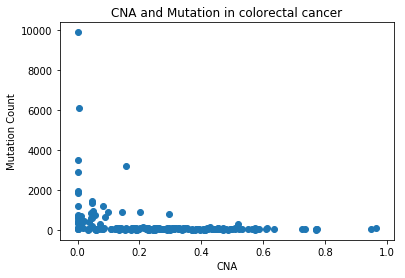

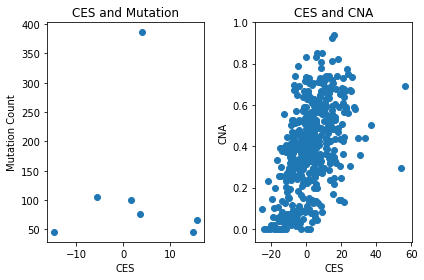

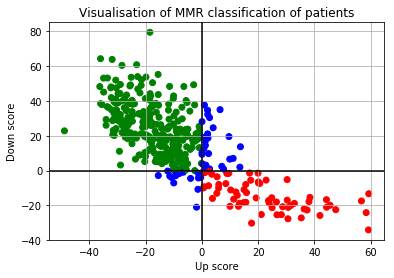

In [179]:
show_plots(colorectal, ces_colo, msi_colo, 'colorectal')

# Conclusions:
- High mutation rate and CNA are mutually exclusive
- No possible conclusion on CES and mutation
- CES and CNA ARE correlated
- MMR classification technique used is relevant in colorectal cancer

# Lung Adenocarcinoma

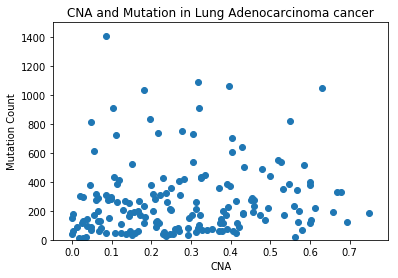

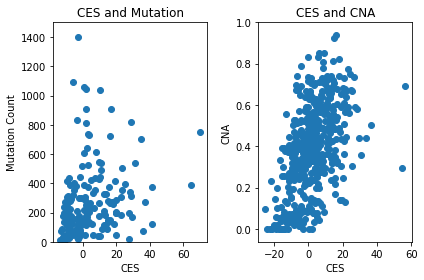

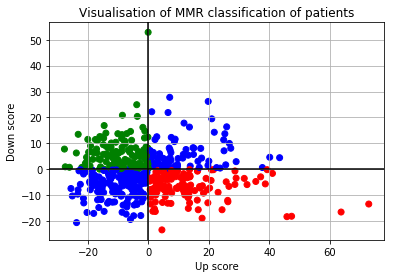

In [180]:
show_plots(lung_adeno, ces_adeno, msi_adeno, 'Lung Adenocarcinoma',ylim_mut=1500)

# Conclusions:
- High mutation rate and CNA not correlated
- CES and Mutation count don't seem correlated
- CES and CNA correlated
- MMR classification technique used doesn't seem relevant in lung cancer

# Lung Squamous Cell Carcinoma 

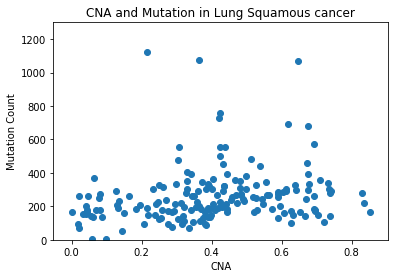

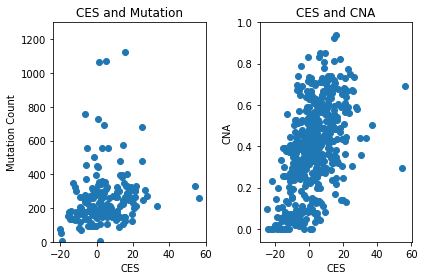

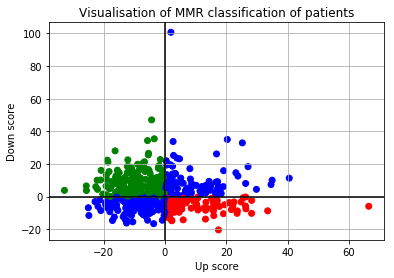

In [181]:
show_plots(lung_squa, ces_squa, msi_squa ,'Lung Squamous',ylim_mut=1300)

# Conclusions:
- High mutation rate and CNA not correlated
- CES and Mutation count don't seem correlated
- CES and CNA correlated
- MMR classification technique used doesn't seem relevant in lung cancer